In [3]:
import pandas as pd

stevens_df = pd.read_csv("scopus.csv")
stevens_df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Stevens S.S.; Stone G.,"Stevens, S.S. (57218358149); Stone, Geraldine ...",57218358149; 36795955900,"Finger span: Ratio scale, category scale, and ...",1959,Journal of Experimental Psychology,57.0,2,NaN,91,...,NaN,NaN,13641579.0,English,NaN,Article,Final,NaN,Scopus,2-s2.0-0005507597
1,Stevens S.S.,"Stevens, S.S. (57218358149)",57218358149,Tonal density,1934,Journal of Experimental Psychology,17.0,4,NaN,585,...,NaN,NaN,NaN,English,NaN,Article,Final,NaN,Scopus,2-s2.0-0242450500
2,STEVENS S.S.; STONE G.,"STEVENS, S.S. (57218358149); STONE, G. (595808...",57218358149; 59580849300,"Psychological writing, easy and hard.",1947,The American psychologist,2.0,7,NaN,230,...,NaN,NaN,20254703.0,English,Am Psychol,Article,Final,NaN,Scopus,2-s2.0-70350427508
3,Aiba T.S.; Stevens S.S.,"Aiba, T.S. (7005187806); Stevens, S.S. (572183...",7005187806; 57218358149,Relation of brightness to duration and luminan...,1964,Vision Research,4.0,7-8,NaN,391,...,NaN,VISRA,5888611.0,English,Vis. Res.,Article,Final,NaN,Scopus,2-s2.0-49749216399
4,Stevens S.S.,"Stevens, S.S. (57218358149)",57218358149,On the measurement of sensation,1959,Acta Psychologica,15.0,C,NaN,91,...,NaN,APSOA,NaN,English,Acta Psychol.,Conference paper,Final,NaN,Scopus,2-s2.0-49749183780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Newman E.B.; Stevens S.S.; Davis H.,"Newman, E.B. (57206131057); Stevens, S.S. (572...",57206131057; 57218358149; 55594961400,Factors in the Production of Aural Harmonics a...,1937,Journal of the Acoustical Society of America,9.0,2,NaN,107,...,NaN,NaN,NaN,English,J. Acoust. Soc. Am.,Article,Final,NaN,Scopus,2-s2.0-0343450053
95,Stevens S.S.,"Stevens, S.S. (57218358149)",57218358149,Concerning the measurement of brightness.,1966,Journal of the Optical Society of America,56.0,8,NaN,1135,...,NaN,NaN,5969100.0,English,J Opt Soc Am,Article,Final,NaN,Scopus,2-s2.0-0013937453
96,Stevens S.S.,"Stevens, S.S. (57218358149)",57218358149,The direct estimation of sensory magnitudes--l...,1987,The American journal of psychology,100.0,3-4,NaN,664,...,NaN,NaN,3322062.0,English,Am J Psychol,Article,Final,NaN,Scopus,2-s2.0-0023408906
97,Stevens S.S.,"Stevens, S.S. (57218358149)",57218358149,A neural quantum in sensory discrimination,1972,Science,177.0,4051,NaN,749,...,NaN,NaN,4340757.0,English,NaN,Review,Final,NaN,Scopus,2-s2.0-0015398967


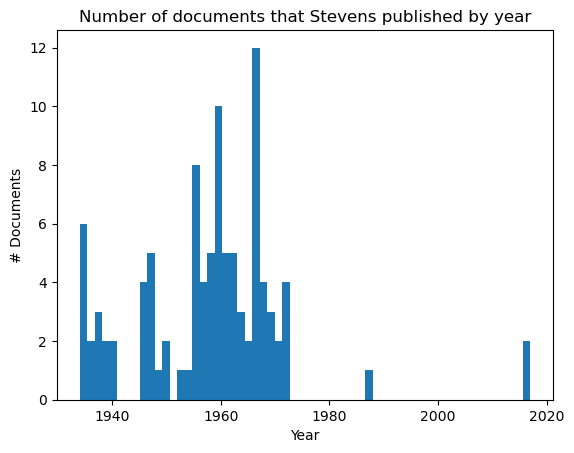

In [16]:
import matplotlib.pyplot as plt

plt.hist(stevens_df["Year"].tolist(), bins = 60)
plt.title("Number of documents that Stevens published by year")
plt.xlabel("Year")
plt.ylabel("# Documents")
plt.show()

In [23]:
stevens_df[["Year"]].assign(count=1).groupby("Year").count().sort_values("count", ascending = False)

,count
Year,
1966,10
1959,5
1961,5
1960,5
1947,5
1935,5
1958,5
1955,5
1972,4


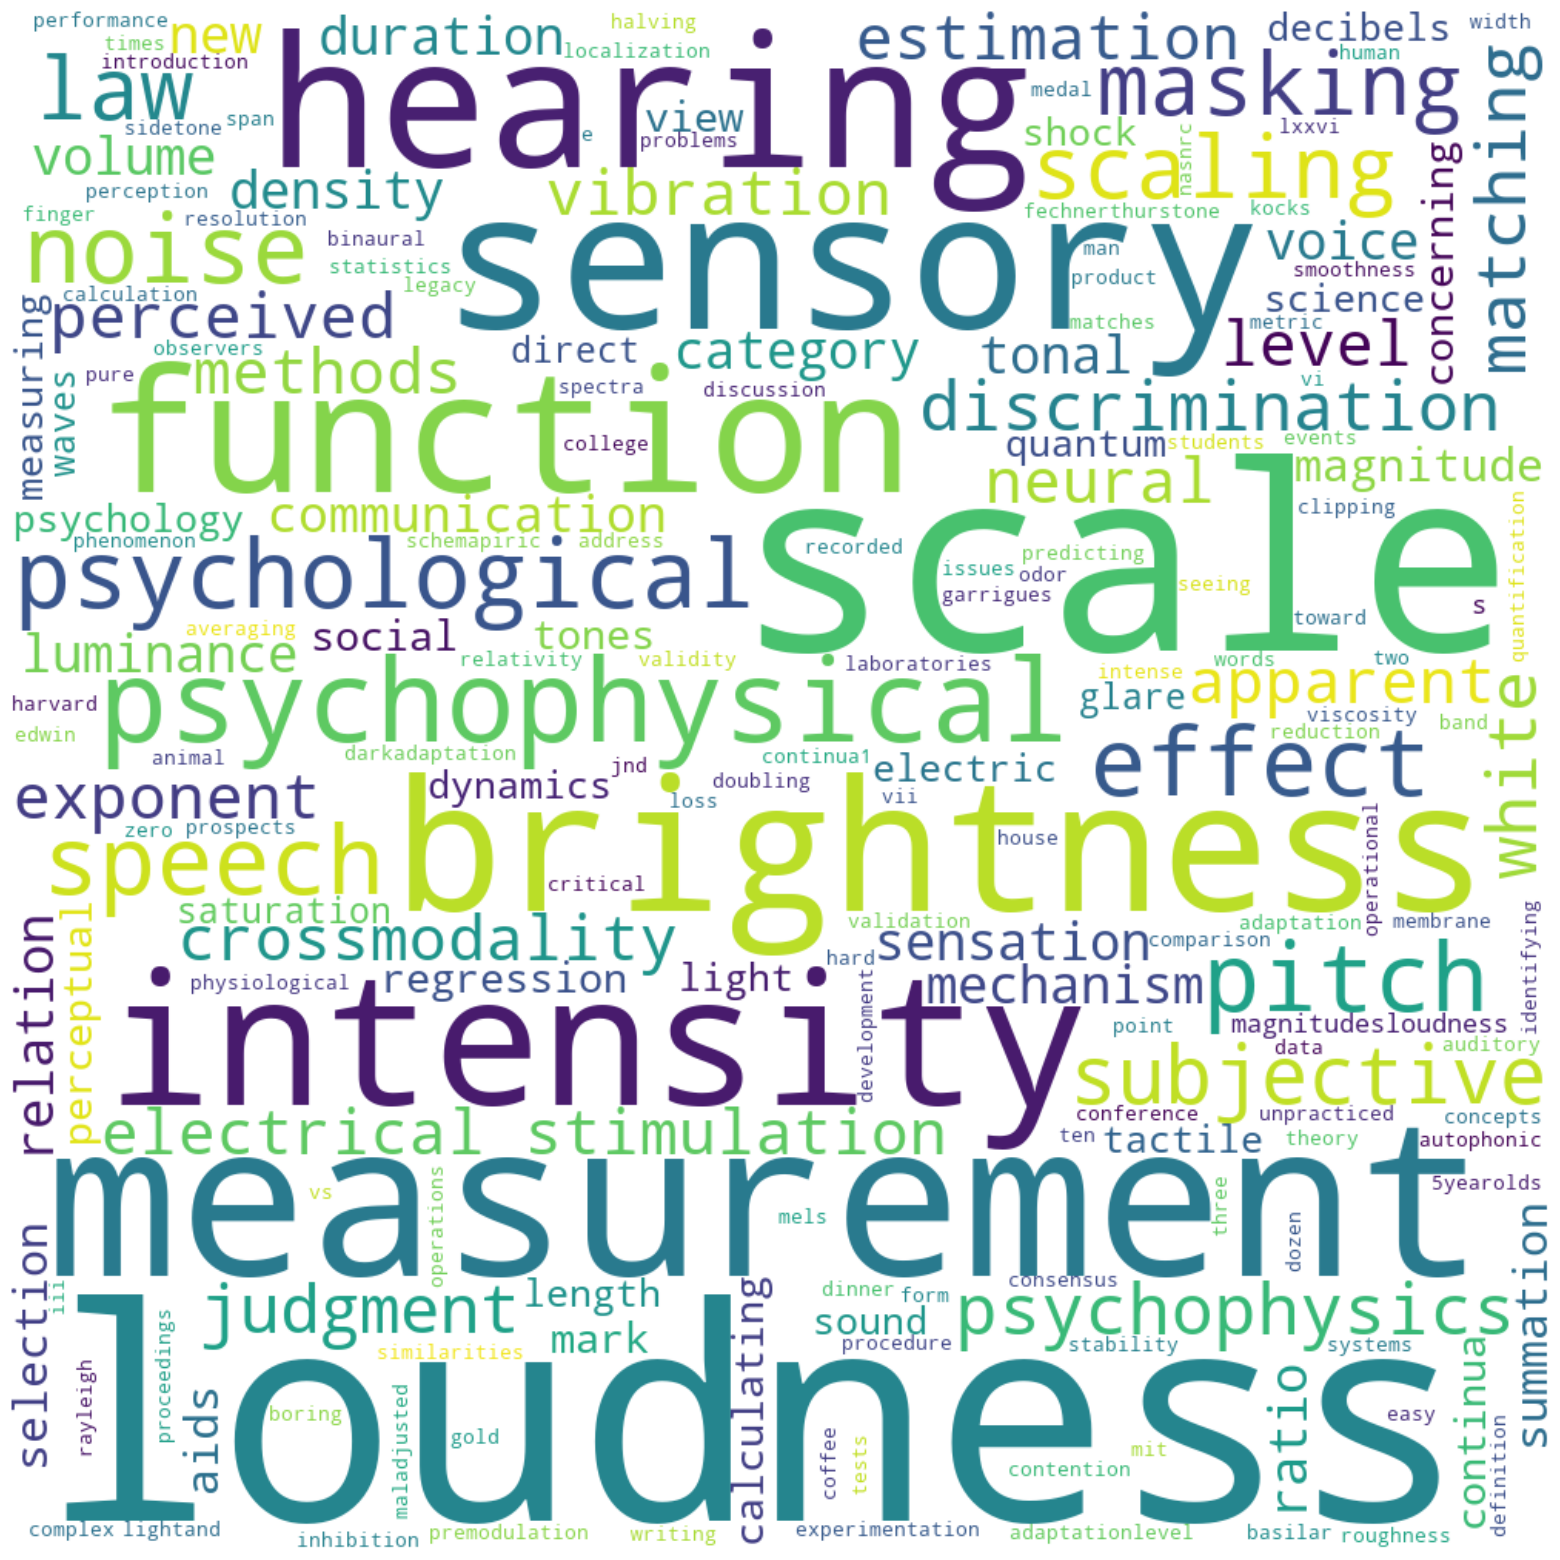

In [45]:
import re
from wordcloud import WordCloud

bow = sum([
    re.sub("[^A-z0-9 ]", "", title).lower().split()
    for title in stevens_df["Title"].to_list()
], start = [])

# Generate a word cloud image
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color="white"
).generate(" ".join(bow))

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
# Must install tabulate
print(stevens_df[
    ["Authors", "Title", "Cited by", "Year", "DOI"]
].sort_values(
    "Cited by",
    ascending = False
).head(5).to_markdown(index = False))

| Authors                                | Title                                                            |   Cited by |   Year | DOI                          |
|:---------------------------------------|:-----------------------------------------------------------------|-----------:|-------:|:-----------------------------|
| Stevens S.S.                           | On the theory of scales of measurement                           |       2955 |   1946 | 10.1126/science.103.2684.677 |
| Stevens S.S.                           | On the psychophysical law                                        |       2298 |   1957 | 10.1037/h0046162             |
| Stevens S.S.; Volkmann J.; Newman E.B. | A Scale for the Measurement of the Psychological Magnitude Pitch |        742 |   1937 | 10.1121/1.1915893            |
| Stevens S.S.; Galanter E.H.            | Ratio scales and category scales for a dozen perceptual continua |        611 |   1957 | 10.1037/h0043680             |
| Stevens S.S.        